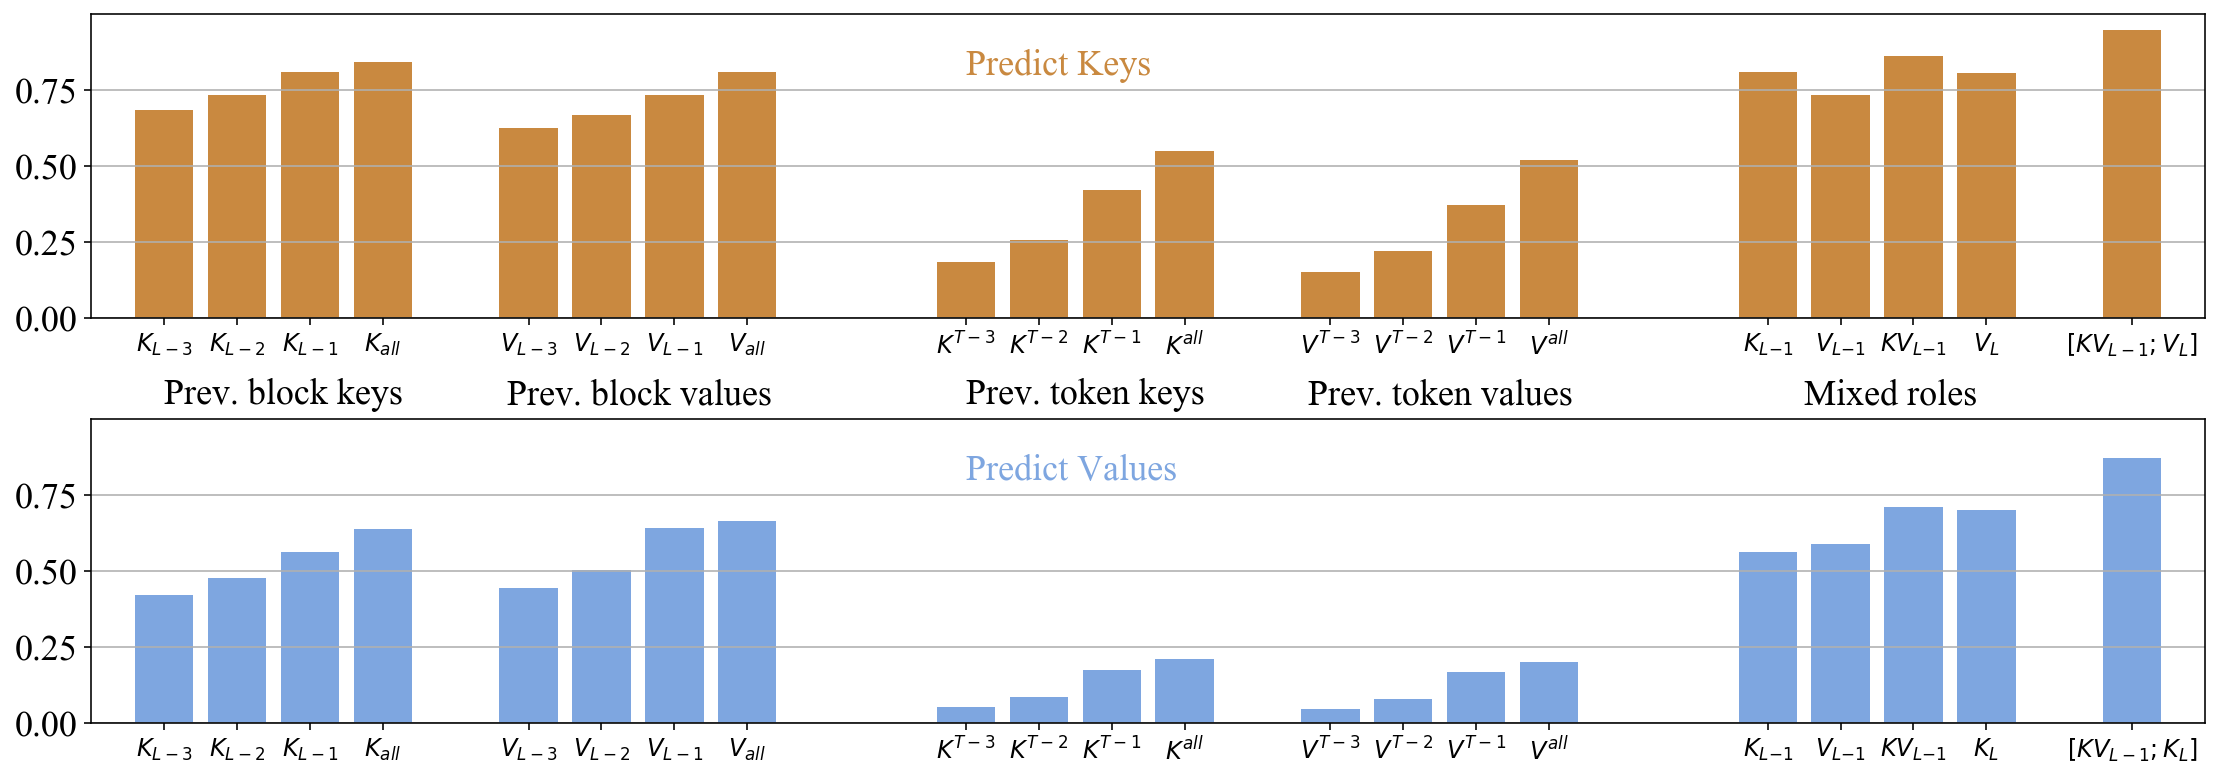

In [119]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({
        "font.family": "Times New Roman",
        "axes.labelsize": 18,
        "font.size": 18,
        "legend.fontsize": 18,
        "xtick.labelsize": 12,
        "ytick.labelsize": 18,
})
fig = plt.figure(figsize=[16, 6])
# plt.suptitle("Explained Variance Ratio by past layers (L), tokens (T) and roles.")

plt.xticks([])
plt.yticks([])
plt.subplot(211)

plt.bar([0, 1, 2, 3,
         5, 6, 7, 8,
         11, 12, 13, 14,
         16, 17, 18, 19,
         22, 23, 24, 25, 27
        ],
        [0.68573, 0.7345, 0.81161, 0.843399,
         0.62651638,0.669322,0.7354251,0.8086473,
         0.18381, 0.2582, 0.42226, 0.549384,
         0.151846,0.21934340,0.372002,0.51934,
         0.81161, 0.7354, 0.86367, 0.80786, 0.949165
        ], color='#C98940')
plt.xticks([0, 1, 2, 3,
         5, 6, 7, 8,
         11, 12, 13, 14,
         16, 17, 18, 19,
         22, 23, 24, 25, 27
        ],
           ["$K_{L-3}$", "$K_{L-2}$", "$K_{L-1}$", "$K_{all}$",
            "$V_{L-3}$", "$V_{L-2}$", "$V_{L-1}$", "$V_{all}$",
            "$K^{T-3}$", "$K^{T-2}$", "$K^{T-1}$", "$K^{all}$",
            "$V^{T-3}$", "$V^{T-2}$", "$V^{T-1}$", "$V^{all}$",
            "$K_{L{-}1}$", "$V_{L{-}1}$", "$KV_{L{-}1}$", "$V_L$", "$[KV_{L-1};V_{L}]$"
           ]);
plt.text(11.0, 0.8, "Predict Keys", color='#C98940')

plt.yticks([0, 0.25, 0.5, 0.75])
plt.ylim(0, 1)
plt.xlim(-1, 28)
plt.grid(axis='y')

plt.subplot(212)
plt.bar([0, 1, 2, 3,
         5, 6, 7, 8,
         11, 12, 13, 14,
         16, 17, 18, 19,
         22, 23, 24, 25, 27
        ],
        [0.4233,0.479014,0.56324,0.64015,
         0.446306, 0.5045, 0.64106, 0.66611,
         0.052260, 0.08503, 0.175991, 0.212625,
         0.046866, 0.0783, 0.16738, 0.20178,
         0.56324, 0.59107, 0.71207, 0.70300, 0.874102
        ], color="#7ea6e0")
plt.xticks([0, 1, 2, 3,
         5, 6, 7, 8,
         11, 12, 13, 14,
         16, 17, 18, 19,
         22, 23, 24, 25, 27
        ],
           ["$K_{L-3}$", "$K_{L-2}$", "$K_{L-1}$", "$K_{all}$",
            "$V_{L-3}$", "$V_{L-2}$", "$V_{L-1}$", "$V_{all}$",
            "$K^{T-3}$", "$K^{T-2}$", "$K^{T-1}$", "$K^{all}$",
            "$V^{T-3}$", "$V^{T-2}$", "$V^{T-1}$", "$V^{all}$",
            "$K_{L{-}1}$", "$V_{L{-}1}$", "$KV_{L{-}1}$", "$K_{L}$", "$[KV_{L-1};K_{L}]$"
           ]);
plt.yticks([0, 0.25, 0.5, 0.75])
plt.text(11.0, 0.8, "Predict Values", color="#7ea6e0")

plt.ylim(0, 1)
plt.xlim(-1, 28)
plt.grid(axis='y')

fig.tight_layout(pad=1.5)
plt.text(0.0, 1.05, "Prev. block keys", color="black")
plt.text(4.7, 1.05, "Prev. block values", color="black")
plt.text(11, 1.05, "Prev. token keys", color="black")
plt.text(15.7, 1.05, "Prev. token values", color="black")
plt.text(22.5, 1.05, "Mixed roles", color="black")

plt.savefig('appendix_fig2_extra.pdf', format='pdf', bbox_inches='tight', pad_inches=0)


In [120]:
import json
matplotlib.rcParams.update({
        "font.family": "Times New Roman",
        "axes.labelsize": 18,
        "font.size": 18,
        "legend.fontsize": 18,
        "xtick.labelsize": 12,
        "ytick.labelsize": 18,
})

results = json.load(open("results.json", 'r'))

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.suptitle("Explained Variance Ratio from Chosen Dependencies Across Transformer Blocks.")

plt.plot(range(1, 28),
[results[str(i)]['keys']['prev_keys']['valid_explained_variance_ratio'] for i in range(1, 28)],
    marker='o', color='#C98940', label="$K_{L{-}1}$ -> $K_L$"
)
plt.plot(range(1, 28),
[results[str(i)]['values']['prev_values']['valid_explained_variance_ratio'] for i in range(1, 28)],
    marker='o', color='#7ea6e0', label="$V_{L{-}1}$ -> $V_L$"
)

plt.plot(range(1, 28),
[results[str(i)]['values']['keys']['valid_explained_variance_ratio'] for i in range(1, 28)],
    marker='o', color='#C98940', linestyle='--', label="$K_{L}$ -> $V_L$"
)
plt.xlabel("Transformer block index (Llama-3.2-3B)")
plt.legend()
plt.yticks([0, 0.25, 0.5, 0.75])
plt.grid()
plt.ylim(0, 1)
plt.savefig('appendix_fig2_layerwise.pdf', format='pdf', bbox_inches='tight', pad_inches=0)
